# Modelling and Evaluation

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:

df = pd.read_csv("C:/Users/farie/Downloads/data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [4]:
df.shape

(14606, 63)

---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

**We add a randomsearch CV which helps us fine tune hte optimal parameters to use for the random forest**

In [37]:
rf = RandomForestClassifier(random_state = 42)#run model
from pprint import pprint #to print parameters used by model

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**We create a model evaluator to test accuracy of models**

In [38]:
#this works for classification models f1-score, accuracy,recall and precisoin values
def evaluator(model, X_test, y_test):

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1score =f1_score(y_test,y_pred)
    print('Model Performance')
    print('Accuracy = {:0.2f} %.'.format(accuracy))
    print('Precision = {:0.2f} %.'.format(precision))
    print('Recall = {:0.2f} %.'.format(recall))
    print('F1 Score = {:0.2f} %.'.format(f1score))
    return 

In [39]:
#select the optimal parameters
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 1000, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }


from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state = 42, class_weight="balanced_subsample")#run model, but we add class weight because there ins an imbalance in values between class of independent variable
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train,y_train)


In [40]:
#check model performance
print("tuned hpyerparameters :(best parameters) ",model_random.best_params_)
print("accuracy :",model_random.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}
accuracy : 0.908617638303019


In [41]:
##evaluate model with test data
evaluator(model_random,X_test,y_test)

Model Performance
Accuracy = 0.90 %.
Precision = 0.76 %.
Recall = 0.05 %.
F1 Score = 0.10 %.


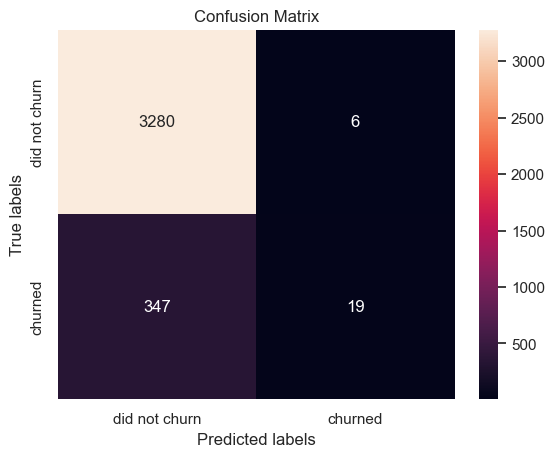

In [42]:
##plot confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not churn', 'churned']); ax.yaxis.set_ticklabels(['did not churn', 'churned']) 
    plt.show() 


y_pred = model_random.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

## Using EasyEnsembleClassifier

In [15]:
from imblearn.ensemble import EasyEnsembleClassifier

model_easyensamble = EasyEnsembleClassifier(random_state=42)
print('Parameters currently in use:\n')
pprint(model_easyensamble.get_params())


Parameters currently in use:

{'base_estimator': 'deprecated',
 'estimator': None,
 'n_estimators': 10,
 'n_jobs': None,
 'random_state': 42,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}


In [30]:
#select the optimal parameters
from scipy.stats import randint

rs_space_2={'n_estimators':np.arange(10, 200, step=50),
              
         }

In [31]:

rf_random_2 = RandomizedSearchCV(model_easyensamble,param_distributions=rs_space_2, n_iter=500, n_jobs=-1, cv=10)
model_random_2 = rf_random.fit(X_train,y_train)

c:\Users\farie\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=500. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [32]:
evaluator(model_random_2,X_test,y_test)

Model Performance
Accuracy = 0.62 %.
Precision = 0.15 %.
Recall = 0.59 %.
F1 Score = 0.23 %.


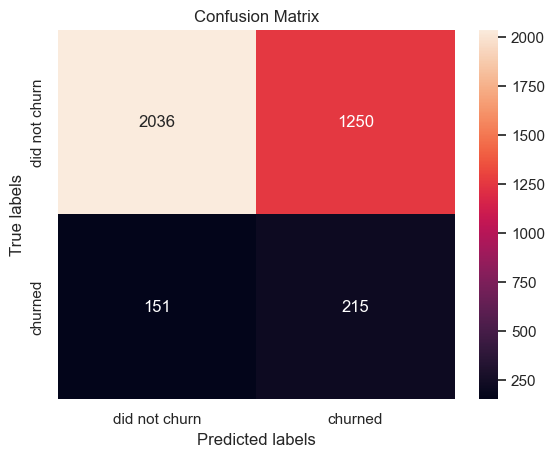

In [33]:
y_pred = model_random_2.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset on the best performing model which is the first one.

In [43]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_random.best_estimator_.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


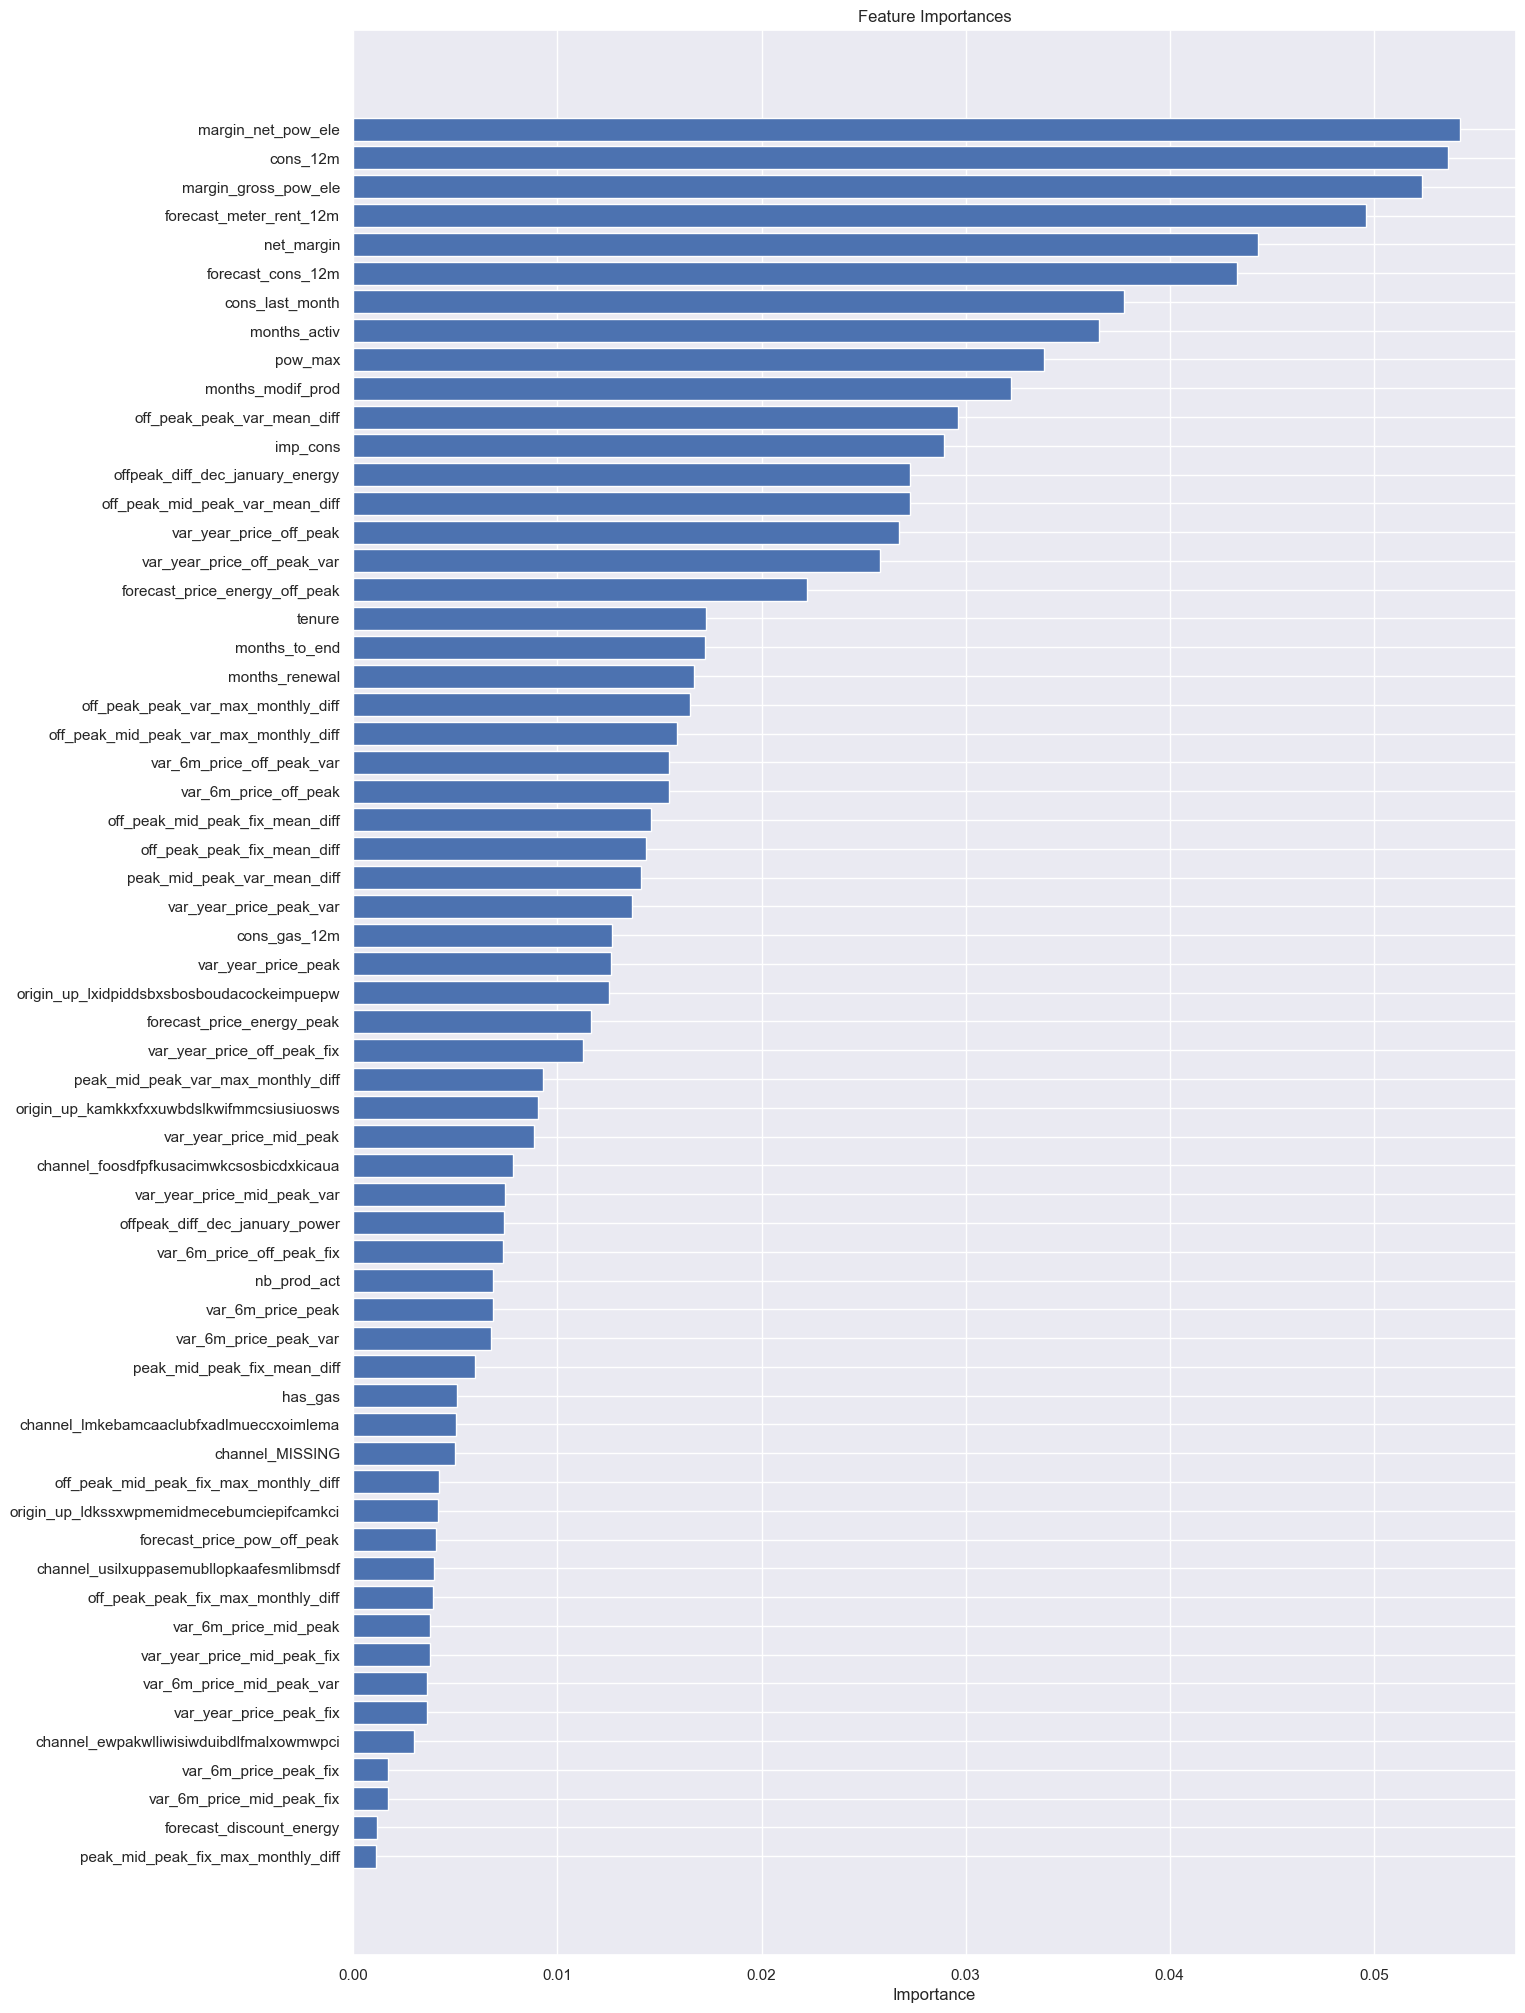

In [44]:
# Calculate feature performance metrics here!
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()